### Movie Recommendation
Recommends movies on content type

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
column_name = ['user_id', 'item_id','rating','timestamp']

In [3]:
df = pd.read_csv('u.data',sep = '\t', names=column_name)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


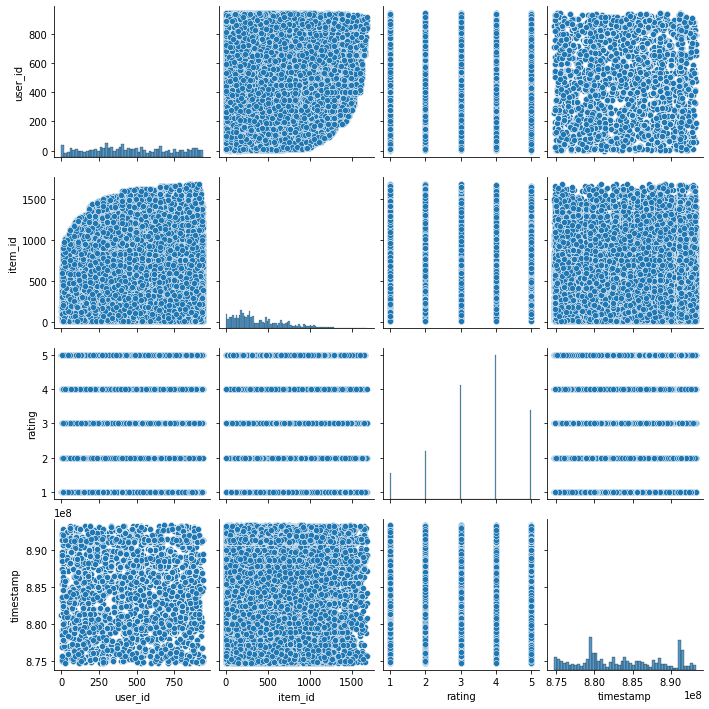

In [6]:
sns.pairplot(df)

In [8]:
df['rating'].unique()

array([5, 1, 3, 2, 4], dtype=int64)

In [9]:
df['user_id'].nunique()

944

In [10]:
df['item_id'].nunique()

1682

<AxesSubplot:xlabel='rating', ylabel='count'>

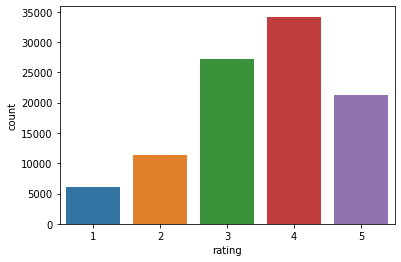

In [11]:
sns.countplot(data=df, x = 'rating')

In [14]:
df['user_id'].value_counts().head()

405    737
655    685
13     636
450    540
276    518
Name: user_id, dtype: int64

In [17]:
df['item_id'].value_counts().head()

50     584
258    509
100    508
181    507
294    485
Name: item_id, dtype: int64

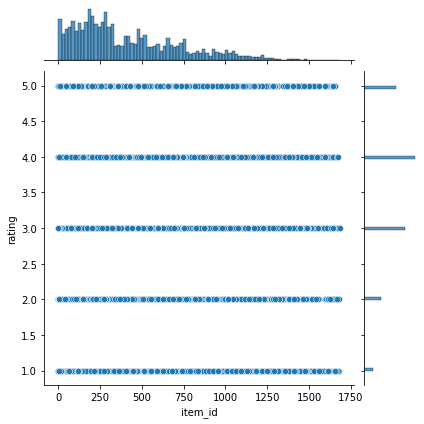

In [22]:
sns.jointplot(data=df,x='item_id',y='rating')

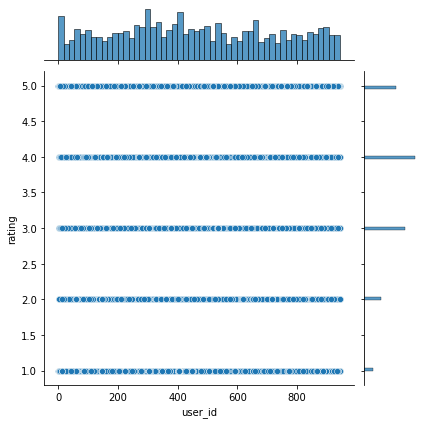

In [23]:
sns.jointplot(df,x='user_id',y='rating')

In [24]:
df_movie_name = pd.read_csv('Movie_Id_Titles')

In [25]:
df_movie_name.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [26]:
df = pd.merge(df,df_movie_name,on='item_id')

In [27]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [28]:
df['title'].value_counts().head()

Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: title, dtype: int64

In [32]:
df_rating = pd.DataFrame(df.groupby('title')['rating'].mean())

In [37]:
df_rating['rating'].sort_values()

title
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Butterfly Kiss (1995)                           1.0
Daens (1992)                                    1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
                                               ... 
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
Santa with Muscles (1996)                       5.0
Prefontaine (1997)                              5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Name: rating, Length: 1664, dtype: float64

In [38]:
df_rating['No of rating'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [43]:
df_rating['No of rating'].sort_values(ascending = False)

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: No of rating, Length: 1664, dtype: int64

<AxesSubplot:xlabel='No of rating', ylabel='count'>

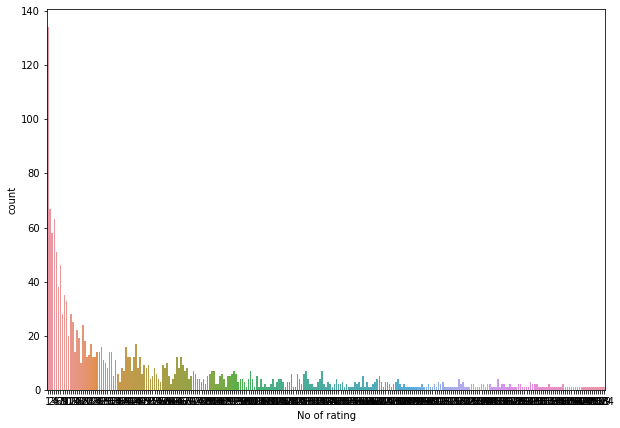

In [49]:
plt.figure(figsize=(10,7))
sns.countplot(df_rating,x='No of rating')

<AxesSubplot:>

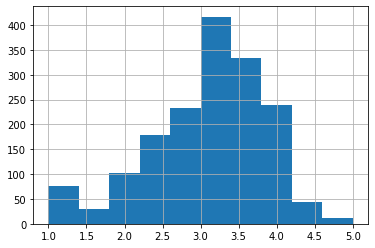

In [53]:
df_rating['rating'].hist()

<AxesSubplot:>

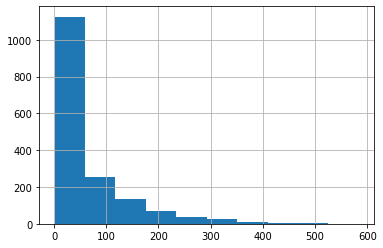

In [54]:
df_rating['No of rating'].hist()

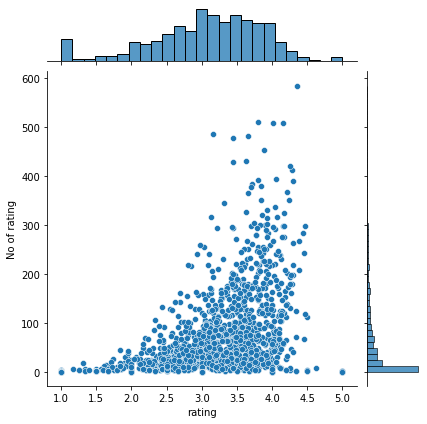

In [55]:
sns.jointplot(data=df_rating,x='rating',y='No of rating')

Above graph shows that a movie with low rating also has less viewers, and movie with higher rating has high no of viewers.

In [59]:
movie_matrix = df.pivot_table(index = 'user_id',columns='title',values='rating')

In [60]:
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df_rating['No of rating'].sort_values(ascending=False)

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: No of rating, Length: 1664, dtype: int64

In [72]:
star_wars = movie_matrix['Star Wars (1977)']
star_wars

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [74]:
similar_to_star_wars = movie_matrix.corrwith(star_wars)
similar_to_star_wars

c:\Users\simran.maurya\Miniconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\simran.maurya\Miniconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [77]:
df_star_wars = pd.DataFrame(similar_to_star_wars,columns=['correlation'])
df_star_wars.dropna(inplace=True)

In [78]:
df_star_wars

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [79]:
df_star_wars = df_star_wars.join(df_rating['No of rating'])

In [80]:
df_star_wars

,correlation,No of rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [86]:
df_star_wars[df_star_wars['No of rating'] > 100]['correlation'].sort_values(ascending=False).head(10)

title
Star Wars (1977)                                      1.000000
Empire Strikes Back, The (1980)                       0.748353
Return of the Jedi (1983)                             0.672556
Raiders of the Lost Ark (1981)                        0.536117
Austin Powers: International Man of Mystery (1997)    0.377433
Sting, The (1973)                                     0.367538
Indiana Jones and the Last Crusade (1989)             0.350107
Pinocchio (1940)                                      0.347868
Frighteners, The (1996)                               0.332729
L.A. Confidential (1997)                              0.319065
Name: correlation, dtype: float64

In [87]:
## General Function for correlation

In [88]:
k = 'Sting, The (1973)'

In [90]:
k_mat = movie_matrix[k]
k_mat

user_id
0      NaN
1      4.0
2      NaN
3      NaN
4      NaN
      ... 
939    NaN
940    5.0
941    NaN
942    NaN
943    5.0
Name: Sting, The (1973), Length: 944, dtype: float64

In [91]:
similar_to_k = movie_matrix.corrwith(k_mat)

c:\Users\simran.maurya\Miniconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\simran.maurya\Miniconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [92]:
similar_to_k

title
'Til There Was You (1997)                0.818182
1-900 (1994)                             0.944911
101 Dalmatians (1996)                    0.161839
12 Angry Men (1957)                      0.344150
187 (1997)                               0.000000
                                           ...   
Young Guns II (1990)                    -0.027601
Young Poisoner's Handbook, The (1995)   -0.291692
Zeus and Roxanne (1997)                  0.866025
unknown                                  0.745356
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [95]:
df_k = pd.DataFrame(similar_to_k,columns=['correlation'])
df_k.dropna(inplace=True)

In [96]:
df_k = df_k.join(df_rating['No of rating'])

In [98]:
df_k[df_k['No of rating'] > 100]['correlation'].sort_values(ascending=False).head(10)

title
Sting, The (1973)                            1.000000
Butch Cassidy and the Sundance Kid (1969)    0.546303
Dumbo (1941)                                 0.502912
Wrong Trousers, The (1993)                   0.460187
Miracle on 34th Street (1994)                0.446223
Kiss the Girls (1997)                        0.435090
True Romance (1993)                          0.432751
Mr. Smith Goes to Washington (1939)          0.430209
Bridge on the River Kwai, The (1957)         0.429090
Waterworld (1995)                            0.416505
Name: correlation, dtype: float64

In [104]:
def recommend(s):
    s_mat = movie_matrix[s]
    similar_to_s = movie_matrix.corrwith(s_mat)
    df_s = pd.DataFrame(similar_to_k,columns=['correlation'])
    df_s.dropna(inplace=True)
    df_s = df_s.join(df_rating['No of rating'])
    movies = df_s[df_s['No of rating'] > 100]['correlation'].sort_values(ascending=False).head(10)
    print(movies)

In [107]:
print('Enter name of the movie')
s = input()
print(s)
recommend(s)

Enter name of the movie
Wrong Trousers, The (1993)


c:\Users\simran.maurya\Miniconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\simran.maurya\Miniconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


title
Sting, The (1973)                            1.000000
Butch Cassidy and the Sundance Kid (1969)    0.546303
Dumbo (1941)                                 0.502912
Wrong Trousers, The (1993)                   0.460187
Miracle on 34th Street (1994)                0.446223
Kiss the Girls (1997)                        0.435090
True Romance (1993)                          0.432751
Mr. Smith Goes to Washington (1939)          0.430209
Bridge on the River Kwai, The (1957)         0.429090
Waterworld (1995)                            0.416505
Name: correlation, dtype: float64
